# Pruebas de Hipótesis y su Aplicación Práctica

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.api import CompareMeans, DescrStatsW
from statsmodels.stats.power import TTestIndPower

## 1. CONFIGURACIÓN Y GENERACIÓN DE DATOS

In [2]:
   np.random.seed(42)
   n_control = 1000
   n_tratamiento = 1000
   # Grupo control (campaña actual)
   tasa_conversion_control = 0.08  # 8%
   conversiones_control = np.random.binomial(1, tasa_conversion_control, n_control)
   gasto_promedio_control = np.random.normal(45, 15, n_control)
   # Grupo tratamiento (campaña nueva)
   tasa_conversion_tratamiento = 0.095  # 9.5%
   conversiones_tratamiento = np.random.binomial(1, tasa_conversion_tratamiento, n_tratamiento)
   gasto_promedio_tratamiento = np.random.normal(48, 16, n_tratamiento)
   print("ANÁLISIS DE CAMPAÑA A/B MARKETING")
   print("=" * 40)
   print(f"Tamaño muestra control: {n_control}")
   print(f"Tamaño muestra tratamiento: {n_tratamiento}")
   print(f"Tasa conversión control: {conversiones_control.mean():.3f}")
   print(f"Tasa conversión tratamiento: {conversiones_tratamiento.mean():.3f}")

ANÁLISIS DE CAMPAÑA A/B MARKETING
Tamaño muestra control: 1000
Tamaño muestra tratamiento: 1000
Tasa conversión control: 0.079
Tasa conversión tratamiento: 0.093


## 2. PRUEBA DE HIPÓTESIS: TASA DE CONVERSIÓN

In [3]:
   # H₀: p_control = p_tratamiento
   # H₁: p_tratamiento > p_control (Cola derecha)
   conversiones = [conversiones_tratamiento.sum(), conversiones_control.sum()]
   muestras = [n_tratamiento, n_control]
   # Z-test unilateral
   z_stat, p_value_conv = proportions_ztest(conversiones, muestras, alternative='larger')
   print(f"\nPRUEBA DE PROPORCIONES - TASA DE CONVERSIÓN")
   print("-" * 45)
   print(f"Estadístico Z: {z_stat:.3f}")
   print(f"Valor p: {p_value_conv:.4f}")
   print(f"Significativo (α=0.05): {'Sí' if p_value_conv < 0.05 else 'No'}")
   # CORRECCIÓN: Cálculo de Cohen's h para proporciones
   p1 = conversiones_tratamiento.mean()
   p2 = conversiones_control.mean()
   h_cohen = 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))
   print(f"Tamaño del efecto (Cohen's h): {h_cohen:.3f} (pequeño: 0.2, mediano: 0.5)")


PRUEBA DE PROPORCIONES - TASA DE CONVERSIÓN
---------------------------------------------
Estadístico Z: 1.117
Valor p: 0.1321
Significativo (α=0.05): No
Tamaño del efecto (Cohen's h): 0.050 (pequeño: 0.2, mediano: 0.5)


## 3. PRUEBA DE HIPÓTESIS: GASTO PROMEDIO

In [6]:
# H₀: μ_control = μ_tratamiento
# H₁: μ_tratamiento > μ_control (Cola derecha)
# T-test unilateral
t_stat, p_value_gasto = stats.ttest_ind(gasto_promedio_tratamiento, gasto_promedio_control, 
                                      alternative='greater', equal_var=False)
print(f"\nPRUEBA T - GASTO PROMEDIO")
print("-" * 30)
print(f"Gasto promedio control: ${gasto_promedio_control.mean():.2f}")
print(f"Gasto promedio tratamiento: ${gasto_promedio_tratamiento.mean():.2f}")
print(f"Diferencia: ${gasto_promedio_tratamiento.mean() - gasto_promedio_control.mean():.2f}")
print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value_gasto:.4f}")
print(f"Significativo (α=0.05): {'Sí' if p_value_gasto < 0.05 else 'No'}")
# CORRECCIÓN: Intervalo de confianza unilateral
cm = CompareMeans(DescrStatsW(gasto_promedio_tratamiento), DescrStatsW(gasto_promedio_control))
conf_int = cm.tconfint_diff(alpha=0.05, alternative='larger')
print(f"IC 95% Diferencia (Unilateral): > ${conf_int[0]:.2f}")


PRUEBA T - GASTO PROMEDIO
------------------------------
Gasto promedio control: $46.48
Gasto promedio tratamiento: $48.03
Diferencia: $1.55
Estadístico t: 2.209
Valor p: 0.0136
Significativo (α=0.05): Sí
IC 95% Diferencia (Unilateral): > $0.39


## 4. ANÁLISIS DE PODER Y TAMAÑO DE MUESTRA

In [7]:
# CORRECCIÓN: Cálculo manual de Cohen's d con varianza muestral (ddof=1)
s_pooled = np.sqrt(((n_tratamiento - 1) * np.var(gasto_promedio_tratamiento, ddof=1) + 
                    (n_control - 1) * np.var(gasto_promedio_control, ddof=1)) / 
                   (n_tratamiento + n_control - 2))
d_cohen = (gasto_promedio_tratamiento.mean() - gasto_promedio_control.mean()) / s_pooled
# Calcular poder (Unilateral)
analysis = TTestIndPower()
power = analysis.solve_power(effect_size=d_cohen, 
                             nobs1=n_tratamiento, 
                             alpha=0.05, 
                             ratio=1.0, 
                             alternative='larger')
print(f"\nANÁLISIS DE PODER ESTADÍSTICO")
print("-" * 35)
print(f"Tamaño del efecto observado (d): {d_cohen:.3f}")
print(f"Poder estadístico: {power:.3f}")
# Calcular tamaño muestra para efecto pequeño (Unilateral)
sample_size = analysis.solve_power(effect_size=0.2, power=0.8, alpha=0.05, alternative='larger')
print(f"Tamaño de muestra necesario para efecto pequeño (d=0.2): {np.ceil(sample_size):.0f} por grupo")


ANÁLISIS DE PODER ESTADÍSTICO
-----------------------------------
Tamaño del efecto observado (d): 0.099
Poder estadístico: 0.713
Tamaño de muestra necesario para efecto pequeño (d=0.2): 310 por grupo


## 5. VISUALIZACIÓN DE RESULTADOS

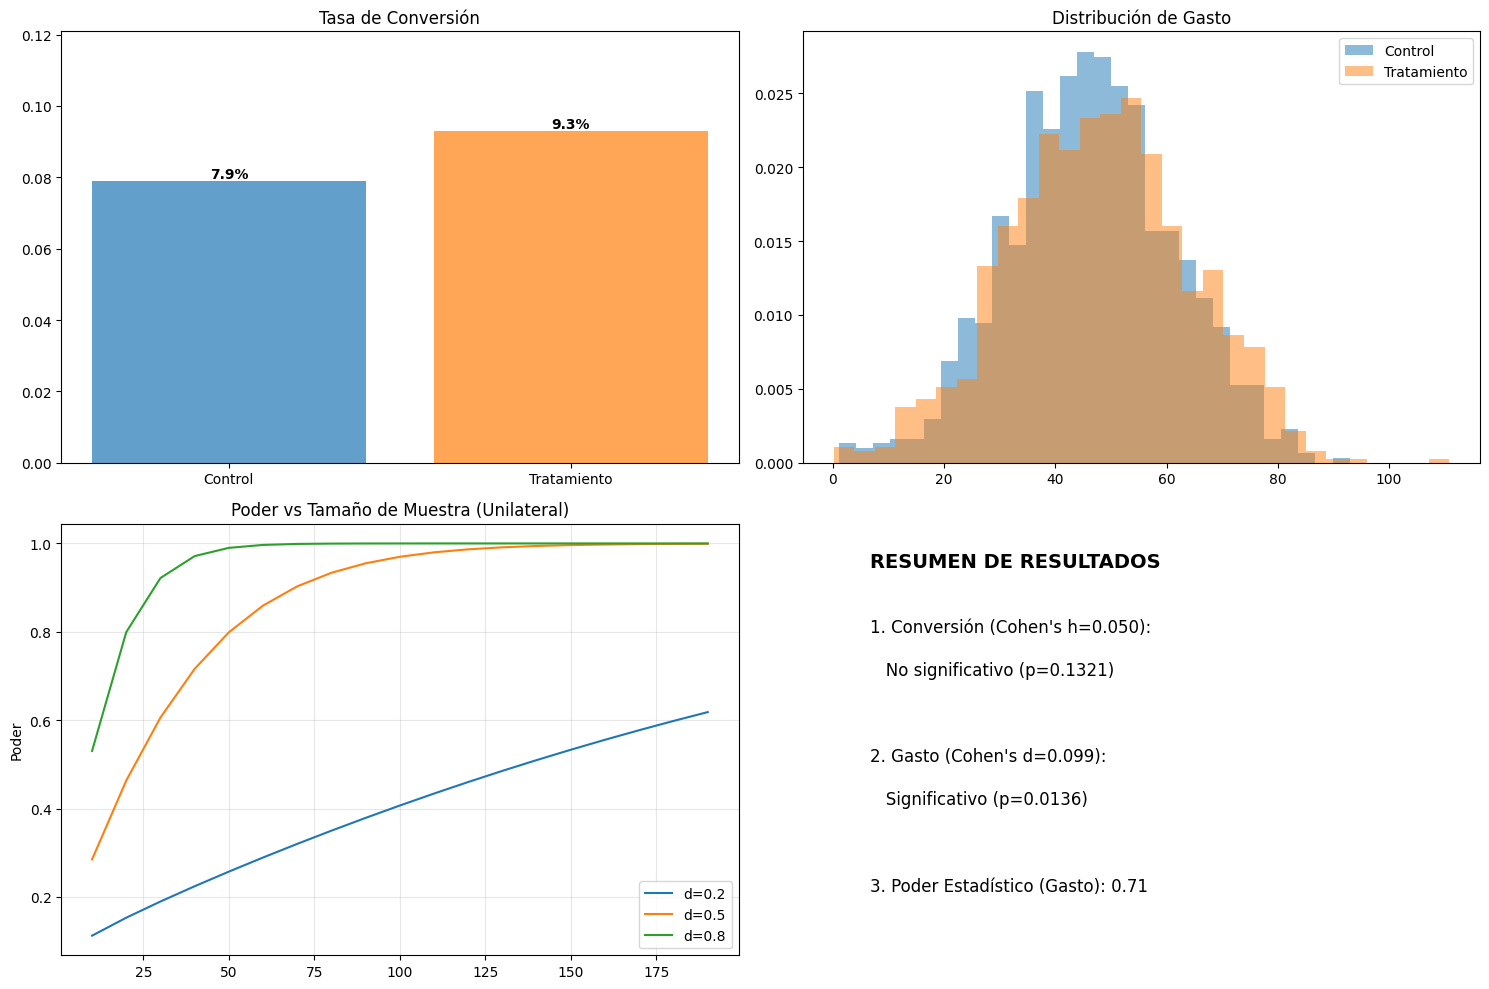


Visualización generada exitosamente.


In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
# A) Gráfico de barras conversiones
labels = ['Control', 'Tratamiento']
rates = [conversiones_control.mean(), conversiones_tratamiento.mean()]
bars = ax1.bar(labels, rates, color=['#1f77b4', '#ff7f0e'], alpha=0.7)
ax1.set_title('Tasa de Conversión')
ax1.set_ylim(0, max(rates) * 1.3)
for bar, rate in zip(bars, rates):
    ax1.text(bar.get_x() + bar.get_width()/2, rate, f'{rate:.1%}', 
             ha='center', va='bottom', fontweight='bold')
# B) Histograma gasto
ax2.hist(gasto_promedio_control, alpha=0.5, label='Control', density=True, bins=30)
ax2.hist(gasto_promedio_tratamiento, alpha=0.5, label='Tratamiento', density=True, bins=30)
ax2.set_title('Distribución de Gasto')
ax2.legend()
# C) Gráfico de Poder (Unilateral)
effect_sizes = [0.2, 0.5, 0.8]
sizes = np.arange(10, 200, 10)
for effect in effect_sizes:
    powers = [analysis.solve_power(effect_size=effect, nobs1=n, alpha=0.05, 
                                   alternative='larger') for n in sizes]
    ax3.plot(sizes, powers, label=f'd={effect}')
ax3.set_title('Poder vs Tamaño de Muestra (Unilateral)')
ax3.set_ylabel('Poder')
ax3.legend()
ax3.grid(True, alpha=0.3)
# D) Resumen Ejecutivo (Corrección de variables)
ax4.axis('off')
ax4.text(0.1, 0.9, 'RESUMEN DE RESULTADOS', fontsize=14, fontweight='bold')
resumen_texto = [
    f"1. Conversión (Cohen's h={h_cohen:.3f}):",
    f"   {'Significativo' if p_value_conv < 0.05 else 'No significativo'} (p={p_value_conv:.4f})",
    "",
    f"2. Gasto (Cohen's d={d_cohen:.3f}):",
    f"   {'Significativo' if p_value_gasto < 0.05 else 'No significativo'} (p={p_value_gasto:.4f})",
    "",
    f"3. Poder Estadístico (Gasto): {power:.2f}"
]
y_pos = 0.75
for line in resumen_texto:
    ax4.text(0.1, y_pos, line, fontsize=12)
    y_pos -= 0.1
plt.tight_layout()
plt.show()
print("\nVisualización generada exitosamente.")

## Verificación

Explica cómo interpretarías estos resultados para recomendar si implementar la campaña nueva. ¿Qué factores considerarías además de la significancia estadística?
- La campaña muestra resultados positivos, pero solo hasta cierto punto. Aunque se observan mejoras leves, no son suficientes para justificar su implementación masiva. La tasa de conversión aumenta, pero no alcanza significancia estadística y el efecto es reducido. El gasto promedio por cliente también crece ligeramente, aunque el impacto económico podría no compensar el costo de la campaña. Antes de decidir, es fundamental evaluar el ROI, analizar resultados por segmentos específicos (clientes nuevos, productos, regiones) y prolongar el piloto para confirmar si el desempeño se mantiene en el tiempo.